# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import types as T

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [11]:
import os


os.chdir('/tf/pyspark_exercises/07_Visualization/Tips/')

In [12]:
import requests
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'

fetching = requests.get(url)


with open('data.csv', 'w', encoding='utf-8') as f:
    f.writelines(fetching.text)


In [13]:
spark = SparkSession.builder\
                    .appName('tips')\
                    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/08 18:24:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [14]:
tips = spark.read.csv('data.csv', header=True)
tips.show(5)

+---+----------+----+------+------+---+------+----+
|_c0|total_bill| tip|   sex|smoker|day|  time|size|
+---+----------+----+------+------+---+------+----+
|  0|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|  1|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|  2|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|  3|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|  4|     24.59|3.61|Female|    No|Sun|Dinner|   4|
+---+----------+----+------+------+---+------+----+
only showing top 5 rows



25/07/08 18:25:31 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , total_bill, tip, sex, smoker, day, time, size
 Schema: _c0, total_bill, tip, sex, smoker, day, time, size
Expected: _c0 but found: 
CSV file: file:///tf/pyspark_exercises/07_Visualization/Tips/data.csv


In [15]:
df = pd.read_csv('data.csv', header=0)
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [17]:
tips = tips.drop('_c0')
tips.show(5)

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
+----------+----+------+------+---+------+----+
only showing top 5 rows



In [20]:
df = df.drop(columns=[c for c in df.columns if 'Unnamed' in c])
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

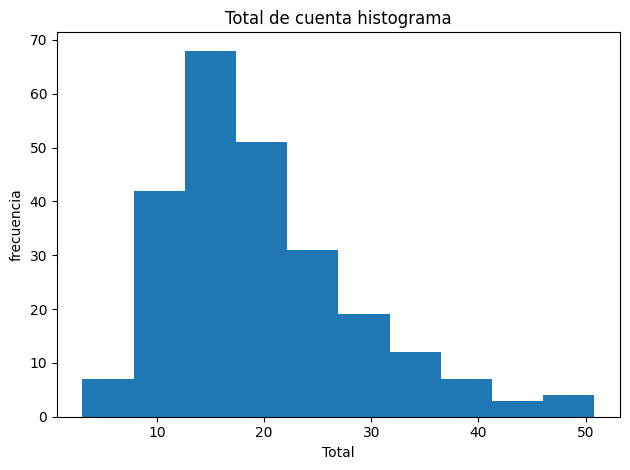

In [22]:
plt.hist(df['total_bill'])
plt.title('Total de cuenta histograma')
plt.ylabel('frecuencia')
plt.xlabel('Total')
plt.tight_layout()
plt.show()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

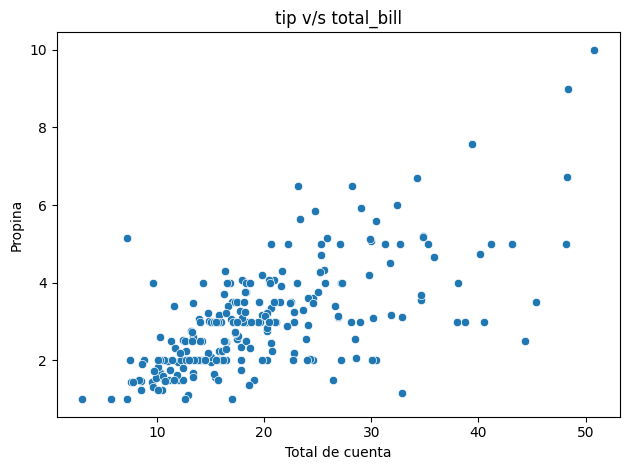

In [26]:
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title('tip v/s total_bill')
plt.ylabel('Propina')
plt.xlabel('Total de cuenta')
plt.tight_layout()
plt.show()

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

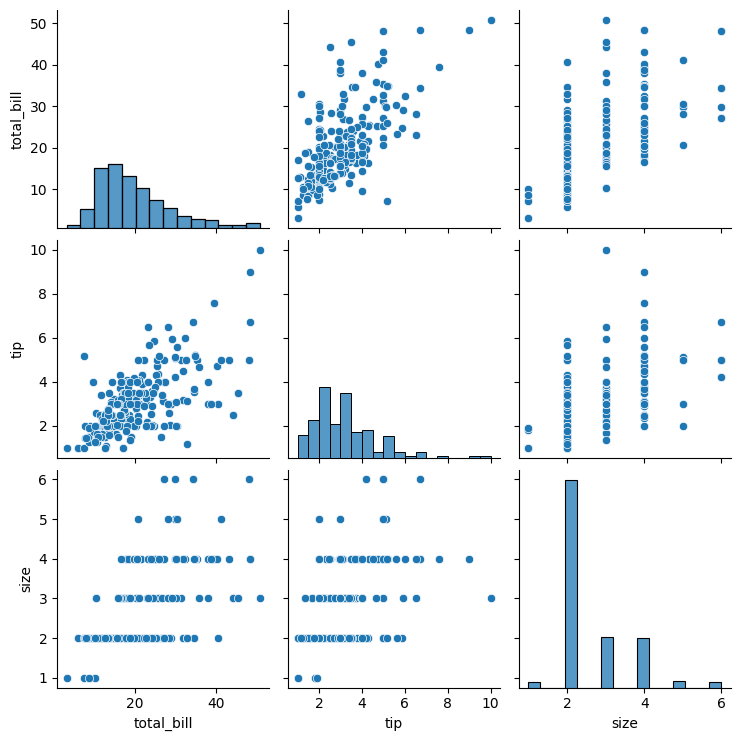

In [32]:
sns.pairplot(data=df)


### Step 8. Present the relationship between days and total_bill value

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

### BONUS: Create your own question and answer it using a graph.